# その他のデータフレーム操作

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [2]:
data = {'City': ['Tokyo','Osaka','Nagoya','Okinawa'],
                 'Temperature': [25.0,28.2,27.3,30.9],
                 'Humidity': [44,42,np.nan,62]}
cities = DataFrame(data)
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


In [3]:
cities.as_matrix()

array([['Tokyo', 44.0, 25.0],
       ['Osaka', 42.0, 28.2],
       ['Nagoya', nan, 27.3],
       ['Okinawa', 62.0, 30.9]], dtype=object)

In [4]:
cities['City'].as_matrix()

array(['Tokyo', 'Osaka', 'Nagoya', 'Okinawa'], dtype=object)

In [5]:
face = ['king','queen','jack','ten','nine','eight',
        'seven','six','five','four','three','two','ace']

suit = ['spades', 'clubs', 'diamonds', 'hearts']

value = range(13,0,-1)

deck = DataFrame({'face': np.tile(face,4),
                  'suit': np.repeat(suit,13),
                  'value': np.tile(value,4)})

deck.head()

,face,suit,value
0,king,spades,13
1,queen,spades,12
2,jack,spades,11
3,ten,spades,10
4,nine,spades,9


In [6]:
np.random.permutation(deck.index)

array([49, 43, 14, 19, 18, 12,  1, 33, 26, 15, 16, 46, 32, 47, 34,  8, 11,
       39, 48, 10,  4, 50, 42, 37, 38, 36,  3, 35, 29,  2,  6,  5, 27, 25,
       44,  0,  7, 13, 23, 51, 24, 22, 30, 31, 20, 40, 17, 28, 45, 41, 21,
        9])

In [7]:
deck = deck.reindex(np.random.permutation(deck.index))
deck.head()

,face,suit,value
43,nine,hearts,9
16,ten,clubs,10
25,ace,clubs,1
27,queen,diamonds,12
26,king,diamonds,13


In [8]:
deck = deck.reset_index(drop=True)
deck.head()

,face,suit,value
0,nine,hearts,9
1,ten,clubs,10
2,ace,clubs,1
3,queen,diamonds,12
4,king,diamonds,13


In [9]:
result = DataFrame()
for c in range(3):
    y = 0
    t = []
    for delta in np.random.normal(loc=0.0, scale=1.0, size=100):
        y += delta
        t.append(y)
    result['Trial %d' % c] = t

result.head()

,Trial 0,Trial 1,Trial 2
0,0.495618,0.167226,0.197310
1,0.669900,0.128516,0.216054
2,2.405499,0.667851,0.879354
3,2.385941,1.709953,1.345948
4,1.878239,1.926017,1.098445


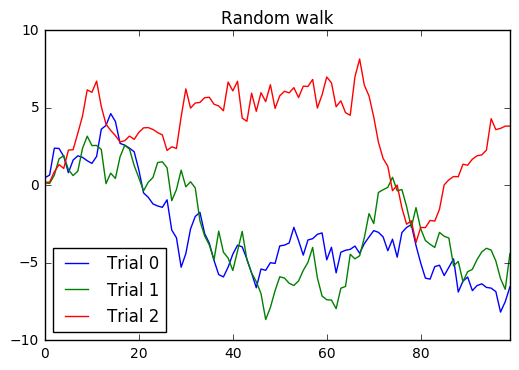

In [10]:
result.plot(title='Random walk')

## 練習問題

次の関数 coin_game は、所持金と掛け金を引数に渡すと、1/2の確率で掛け金の分だけ所持金が増減した値が返ります。

In [11]:
from numpy.random import randint
def coin_game(money, bet):
    coin = randint(2)
    if coin == 0:
        money += bet
    else:
        money -= bet
    return money

次は、1000円の所持金において、100円を賭けた場合の結果を示します。

In [12]:
money = 1000
money = coin_game(money, 100)
money

900

(1) 所持金1000円からスタートして、所持金の50%を賭け続けた場合の所持金の変化をリスト trial に格納してください。（全部で100回繰り返します。）

(2) (1)の処理を3回繰り返して、それぞれの結果を列（trial0, trial1, trial2）とするDataFrameを作成して、変数 df に格納してください。また、その結果をグラフ表示してください。

(3) 関数 coin_game を修正して、1/2の確率で「掛け金の分だけ所持金が増加する」もしくは「掛け金の半分だけ所持金が減少」ようにしてください。修正後の関数名は stock_game とします。（これは、掛け金の分だけ株を購入したところ、1/2の確率が株価が倍、もしくは、半分になる状況をシュミレーションしています。）

(4) (3)の関数を用いて、(2)と同様のグラフを作成してください。